## 1. Introduction

In [1]:
# Regular Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [9]:
space_missions = pd.read_csv("Dataset/Space_Corrected.csv")
space_missions.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


###  1.3 Data Pre-processing ⚙️

In [10]:
space_missions['DateTime'] = pd.to_datetime(space_missions['Datum'])

# Extract the launch year
space_missions['Year'] = space_missions['DateTime'].apply(lambda datetime: datetime.year)

# Extract the country of launch
space_missions["Country"] = space_missions["Location"].apply(lambda location: location.split(", ")[-1])

space_missions.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,China
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,2020-07-23 14:26:00+00:00,2020,Kazakhstan
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,2020-07-23 04:41:00+00:00,2020,China
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20 21:30:00+00:00,2020,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,2020-07-19 21:58:00+00:00,2020,Japan


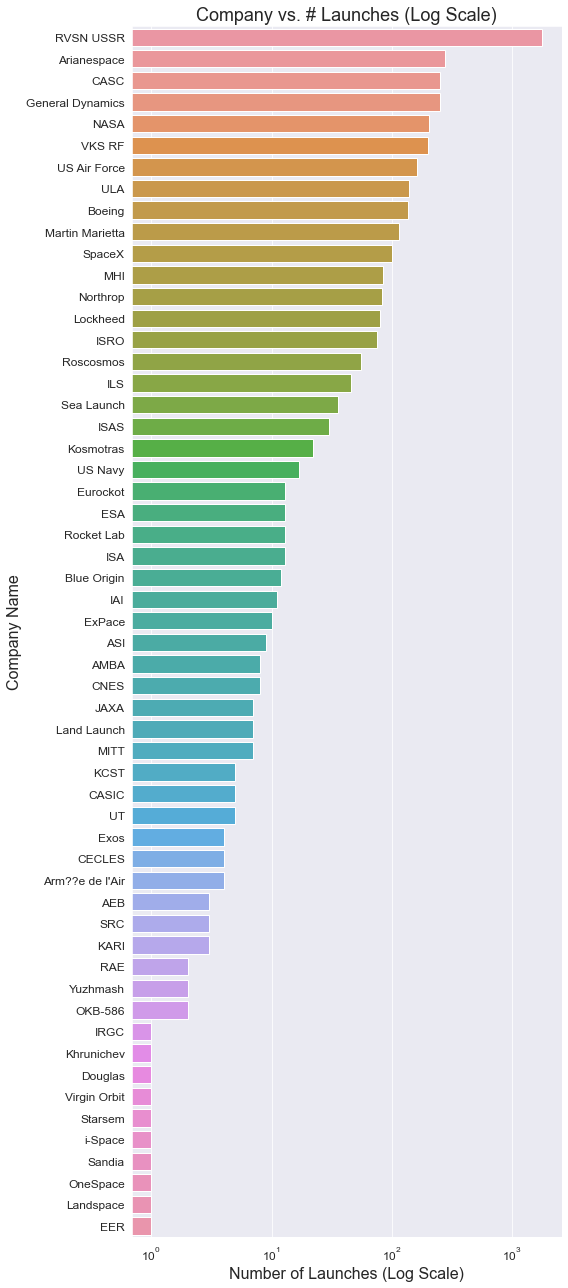

In [11]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y="Company Name", data=space_missions, order=space_missions["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Company vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### 2. Data Visualization 📉

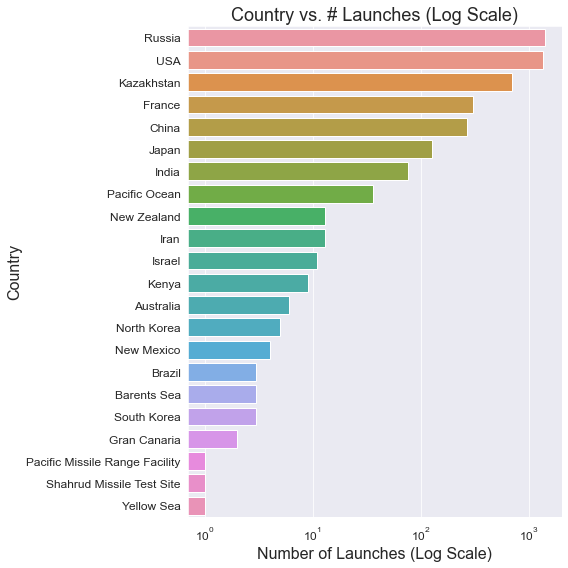

In [12]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=space_missions, order=space_missions["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [3]:
plt.figure(figsize=(12,36))
ax = sns.countplot(y="Location", data=space_missions, order=space_missions["Location"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Location vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined

In [4]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=space_missions, order=space_missions["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined

In [5]:
plt.figure(figsize=(12,36))
ax = sns.countplot(y="Location", data=space_missions, order=space_missions["Location"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Location vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined

In [6]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Status Rocket", data=space_missions, order=space_missions["Status Rocket"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined

In [7]:
plt.figure(figsize=(6,6))
ax = sns.countplot(y="Status Mission", data=space_missions, order=space_missions["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined

In [8]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y=space_missions['Year'])
ax.axes.set_title("Year vs. # Launches",fontsize=18)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

NameError: name 'space_missions' is not defined